Autor: Levir Chianca Medeiros dos Santos

## Importações

In [ ]:
import networkx as nx
import pandas as pd
import json
import numpy as np
import nxviz
from nxviz.plots import CircosPlot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## Manipulando dataset

In [ ]:
#Read in json splice and transform into a playlist level dataframe
start = 0
end = 1000
path = 'mpd.slice.' + str(start) + "-" + str(end-1) + '.json'
d = json.load(open(path, 'r'))
thisSlice = pd.DataFrame.from_dict(d['playlists'][:100], orient='columns')

In [ ]:
#Turn playlist level dataframe into song level dataframe
songPlaylistArray = []
for index, row in thisSlice.iterrows():
    for track in row['tracks']:
        songPlaylistArray.append([track['track_uri'], track['artist_name'], track['track_name'], row['pid']])
songPlaylist = pd.DataFrame(songPlaylistArray, columns=['trackid', 'artist_name', 'track_name', 'pid'])

print(songPlaylist.shape)
songPlaylist.head(10)   #is a df of all track ids, cooresponding artist names, track names and playlist ids

(6100, 4)


,trackid,artist_name,track_name,pid
0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),0
1,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,Britney Spears,Toxic,0
2,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,Beyoncé,Crazy In Love,0
3,spotify:track:1AWQoqb9bSvzTjaLralEkT,Justin Timberlake,Rock Your Body,0
4,spotify:track:1lzr43nnXAijIGYnCT8M8H,Shaggy,It Wasn't Me,0
5,spotify:track:0XUfyU2QviPAs6bxSpXYG4,Usher,Yeah!,0
6,spotify:track:68vgtRHr7iZHpzGpon6Jlo,Usher,My Boo,0
7,spotify:track:3BxWKCI06eQ5Od8TY2JBeA,The Pussycat Dolls,Buttons,0
8,spotify:track:7H6ev70Weq6DdpZyyTmUXk,Destiny's Child,Say My Name,0
9,spotify:track:2PpruBYCo4H7WOBJ7Q2EwM,OutKast,Hey Ya! - Radio Mix / Club Mix,0


In [ ]:
C = songPlaylist.drop(['trackid', 'track_name'], axis=1)

In [ ]:
G = nx.read_graphml('artists_by_playlist.graphml')

NameError: ignored

## Criando a rede

In [ ]:
artists = C['artist_name'].unique()

# Create graph
G = nx.Graph()

# Add artist
G.add_nodes_from(artists)

# Add edge in artists by playlist
for index, row in C.iloc[:-1 , :].iterrows():
    jump = 1
    next_row = C.loc[index+jump]

    while next_row["pid"] == row["pid"]:
        if row["artist_name"] != next_row["artist_name"]:
            G.add_edge(row["artist_name"], next_row["artist_name"])

        jump += 1

        if index+jump < C.shape[0]:
            next_row = C.loc[index+jump]
        else:
            break

In [ ]:
G.number_of_nodes()

2062

In [ ]:
G.number_of_edges()

87997

In [ ]:
nx.number_connected_components(G)

4

In [ ]:
bigger_component = list(nx.connected_components(G))[0]

for component in nx.connected_components(G):
    if len(component) > len(bigger_component):
        bigger_component = component
    print(len(component))

SG = G.subgraph(bigger_component)

2008
40
9
5


## Análises

### Métricas Globais

In [ ]:
nx.eccentricity(SG)

{'Missy Elliott': 5,
 'Britney Spears': 4,
 'Beyoncé': 4,
 'Justin Timberlake': 4,
 'Shaggy': 5,
 'Usher': 4,
 'The Pussycat Dolls': 5,
 "Destiny's Child": 4,
 'OutKast': 4,
 'Nelly Furtado': 4,
 'Jesse McCartney': 5,
 'Cassie': 5,
 'Omarion': 4,
 'Avril Lavigne': 5,
 'Chris Brown': 4,
 'Sheryl Crow': 5,
 'The Black Eyed Peas': 5,
 'Bowling For Soup': 5,
 'The Click Five': 5,
 'Jonas Brothers': 4,
 'Lil Mama': 5,
 'Cascada': 5,
 'Jason Derulo': 4,
 'Ne-Yo': 4,
 'Miley Cyrus': 4,
 'Boys Like Girls': 4,
 'Iyaz': 5,
 'Kesha': 4,
 'Justin Bieber': 4,
 'M.I.A.': 4,
 'The Killers': 4,
 'blink-182': 4,
 'The All-American Rejects': 4,
 'Vanessa Carlton': 5,
 'Cris Cab': 5,
 'Demi Lovato': 4,
 'We The Kings': 5,
 'Survivor': 5,
 'Daniel Tidwell': 5,
 'Kaleptik': 5,
 'Ben Foster': 5,
 'Leslie Odom Jr.': 5,
 'Christopher Jackson': 5,
 'Lin-Manuel Miranda': 5,
 'Led Zeppelin': 5,
 'Collective Soul': 5,
 'Nightwish': 5,
 'Seal': 5,
 'The Rolling Stones': 5,
 'Lynyrd Skynyrd': 5,
 'Boston': 5,
 'Tot

In [ ]:
print("Diameter of network (SG): {}".format(nx.diameter(SG)))

Diameter of network (SG): 6


In [ ]:
# the periphery of a network is a set of all nodes whose eccentriciy is equals the diameter
nx.periphery(SG)

['Lil Pump',
 'Trippie Redd',
 'Smokepurpp',
 'Tokyo Police Club',
 'Foals',
 'Voxtrot',
 'Tegan and Sara',
 'Kelly Price',
 'Florida A&M University Gospel Choir',
 'Norman Hutchins',
 'Dottie Peoples & The Peoples Choice Chorale',
 'Tasha Cobbs Leonard',
 'Donald Lawrence',
 'Benita Washington',
 'The Warriors, DR.Charles G. Hayes',
 'The New Life Community Choir',
 'Donnie McClurkin',
 'Shekinah Glory Ministry',
 'Smokie Norful',
 'Tye Tribbett',
 'Richard Smallwood',
 'Kirk Franklin',
 'Tamela Mann',
 'The Rance Allen Group',
 'CeCe Winans',
 'J Moss',
 'Kurt Carr & The Kurt Carr Singers',
 'Max Minelli',
 'Young Bleed',
 'Caye',
 'Berhana',
 'Daniel Caesar',
 'Abhi//Dijon',
 'Tontario',
 'Masego',
 'Calle 13',
 'Xtreme',
 'A.B. Quintanilla III',
 'Camila',
 'Aventura',
 'Maná',
 'Santana',
 'Nina Sky',
 'N.O.R.E.',
 'Celia Cruz',
 'Young Boss',
 'Ivy Queen',
 'Enrique Iglesias',
 'Boy Wonder Chosen Few',
 'Tito "El Bambino"',
 'Elvis Crespo',
 'Monchy & Alexandra',
 'Julieta Venega

In [ ]:
print("Radius of network(SG): {}".format(nx.radius(SG)))

Radius of network(SG): 3


In [ ]:
print("center of a network(SG): {}".format(nx.center(SG)))

center of a network(SG): ['Lykke Li', 'The Black Keys', 'Ryan Adams', 'David Bowie', 'Mary Lambert', 'Dan Auerbach', 'Bob Dylan', 'Milo Greene', 'Langhorne Slim', 'Phosphorescent', 'The Civil Wars']


In [ ]:
# Export to graphml
# nx.write_graphml(G, 'artists_by_playlist_sample.graphml')

In [ ]:
# G = nx.read_graphml('artists_by_playlist_sample.graphml')

In [ ]:
[key for key, value in sorted(nx.degree_centrality(SG).items(), key=lambda x: x[1])[-10:]]

['Justin Bieber',
 'The Weeknd',
 'Miley Cyrus',
 'The Chainsmokers',
 'Jason Derulo',
 'Maroon 5',
 'Major Lazer',
 'Drake',
 'Ed Sheeran',
 'Rihanna']

In [ ]:
[key for key, value in sorted(nx.closeness_centrality(SG).items(), key=lambda x: x[1])[-10:]]

['Bruno Mars',
 'Sia',
 'Justin Bieber',
 'The Weeknd',
 'Jason Derulo',
 'Miley Cyrus',
 'Maroon 5',
 'Drake',
 'Ed Sheeran',
 'Rihanna']

In [ ]:
[key for key, value in sorted(nx.betweenness_centrality(SG).items(), key=lambda x: x[1])[-10:]]

['Marvin Gaye',
 'Drake',
 'Major Lazer',
 'Queen',
 'Bob Dylan',
 'Ed Sheeran',
 'The Weeknd',
 'Aretha Franklin',
 'Rihanna',
 'Pitbull']

In [ ]:
[key for key, value in sorted(nx.eigenvector_centrality(SG).items(), key=lambda x: x[1])[-10:]]

['Drake',
 'Major Lazer',
 'David Guetta',
 'Justin Bieber',
 'Maroon 5',
 'Miley Cyrus',
 'The Chainsmokers',
 'Jason Derulo',
 'Ed Sheeran',
 'Rihanna']

In [ ]:
!pip install nxviz==0.6.3

     |████████████████████████████████| 11.2 MB 5.3 MB/s 
     |████████████████████████████████| 11.3 MB 37.8 MB/s 
     |████████████████████████████████| 895 kB 52.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Concertando nome de artistas que tem caractere que o nxviz não aceitam

In [ ]:
mapping = {'Joey Bada$$': 'Joey Bada'}

SG = nx.relabel_nodes(SG, mapping)

print(SG.has_node("Joey Bada"))

True


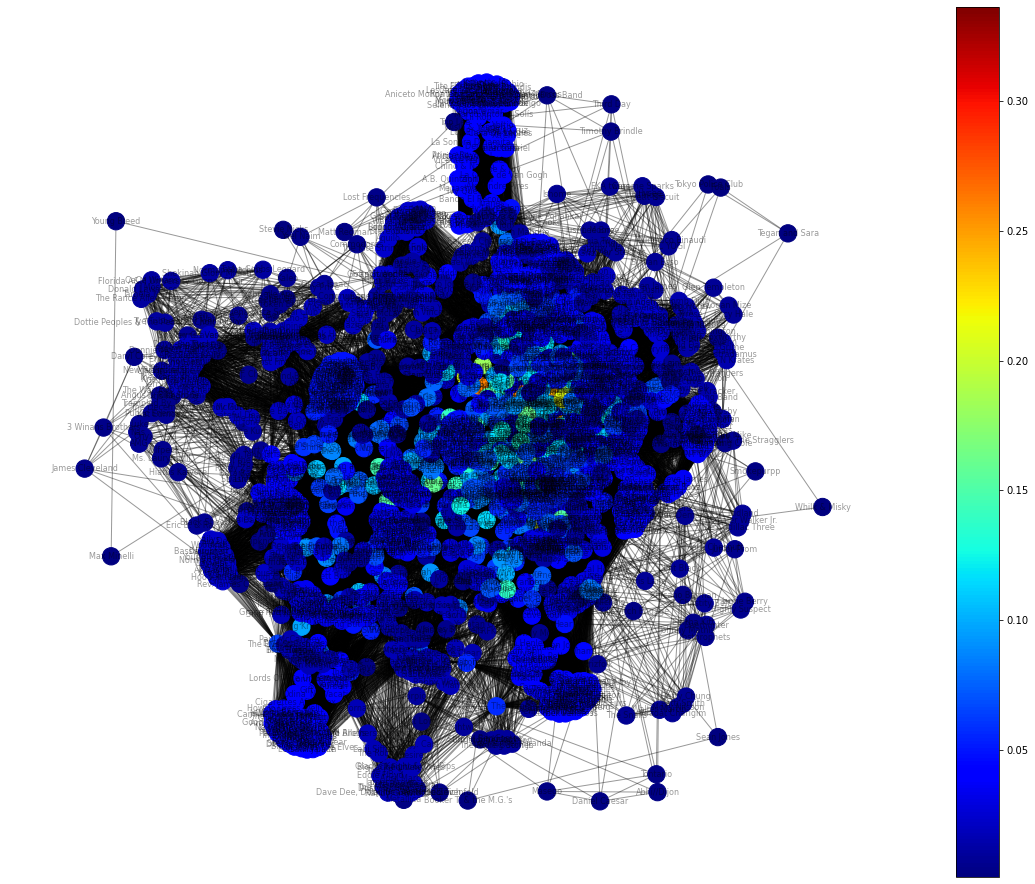

In [ ]:
# the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(SG,seed=123456789,k=0.3)

# color of nodes
color = list(dict(nx.degree_centrality(SG)).values())

# draw edges
nx.draw_networkx_edges(SG,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(SG,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(SG, pos=pos,
                        alpha=0.5,
                        font_color='black', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

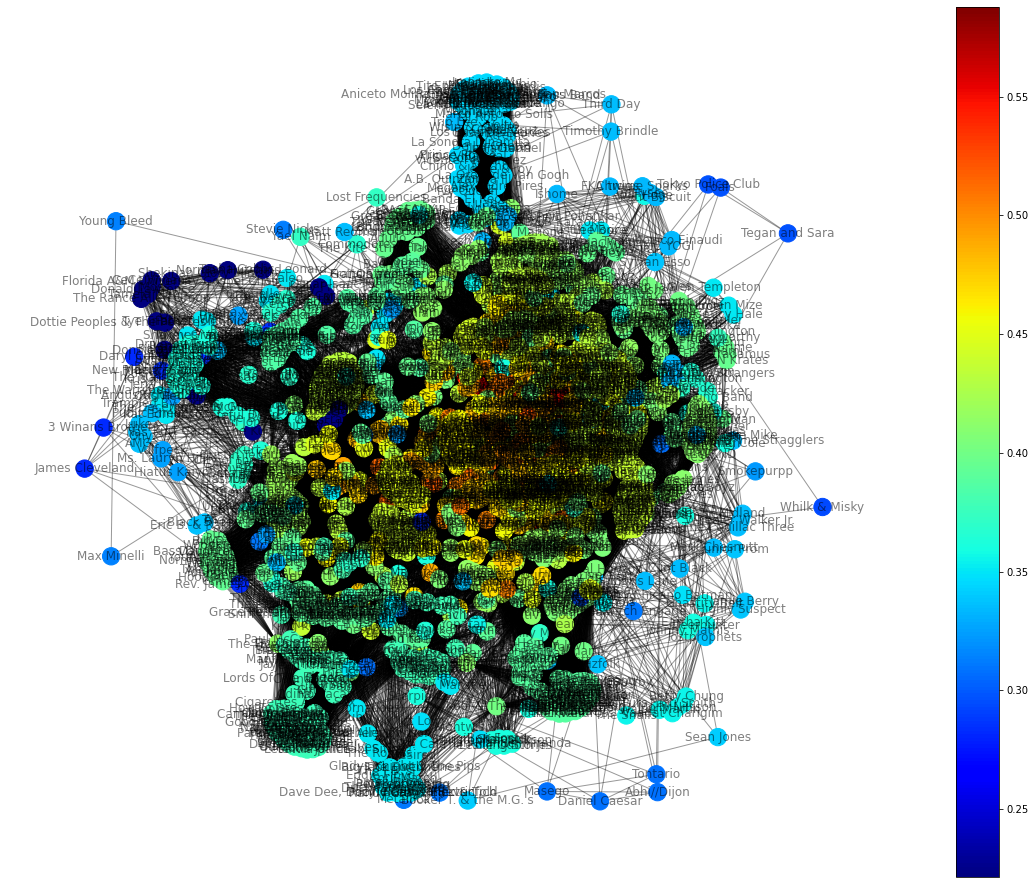

In [ ]:
# the closeness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(SG,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.closeness_centrality(SG)).values())

# draw edges
nx.draw_networkx_edges(SG,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(SG,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(SG, pos=pos,
                        alpha=0.5,
                        font_color='black', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

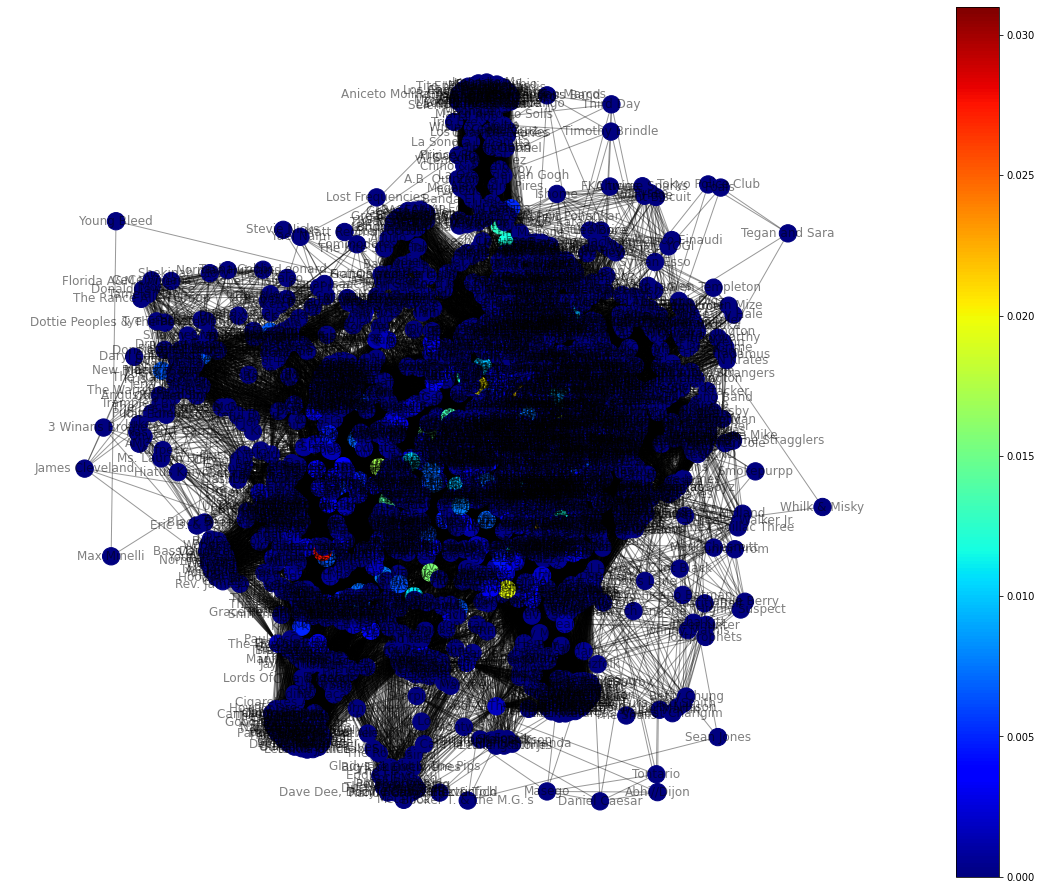

In [ ]:
# the betwenness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(SG,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(SG)).values())

# draw edges
nx.draw_networkx_edges(SG,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(SG,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(SG, pos=pos,
                        alpha=0.5,
                        font_color='black', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

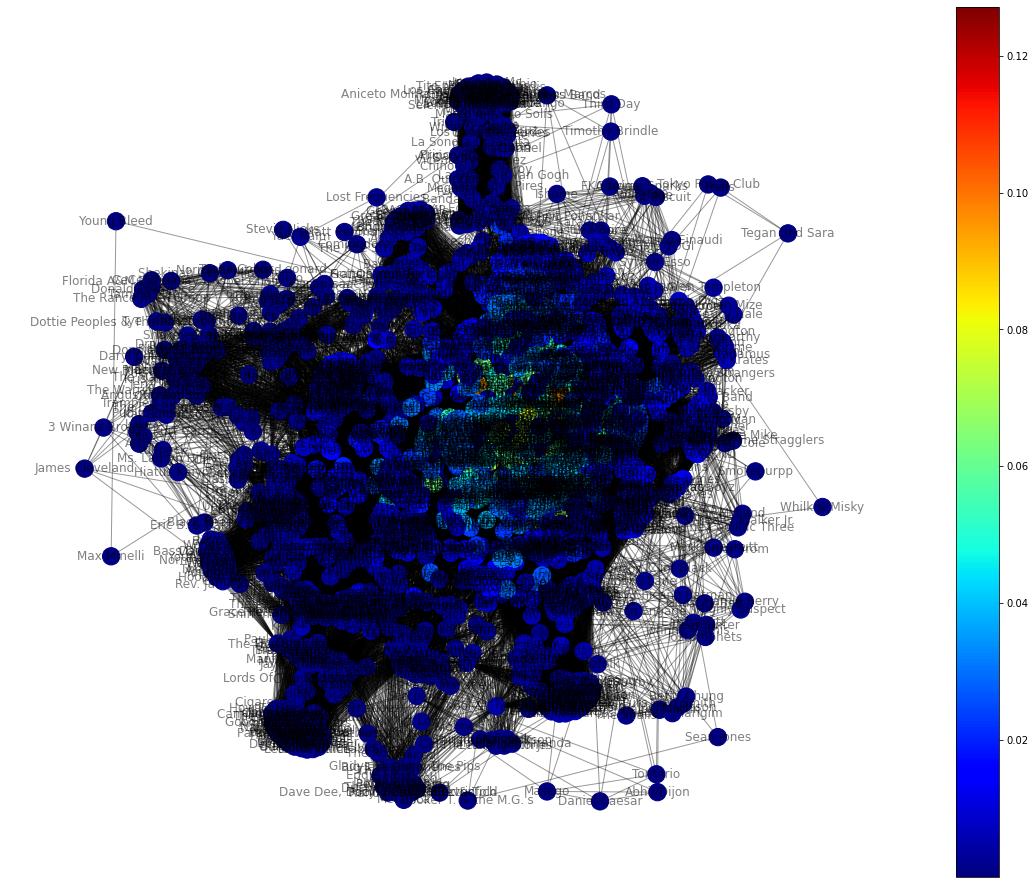

In [ ]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(20,16))

# layout position
pos = nx.spring_layout(SG,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.eigenvector_centrality(SG)).values())

# draw edges
nx.draw_networkx_edges(SG,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(SG,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(SG, pos=pos,
                        alpha=0.5,
                        font_color='black', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

### Análise Bivariada

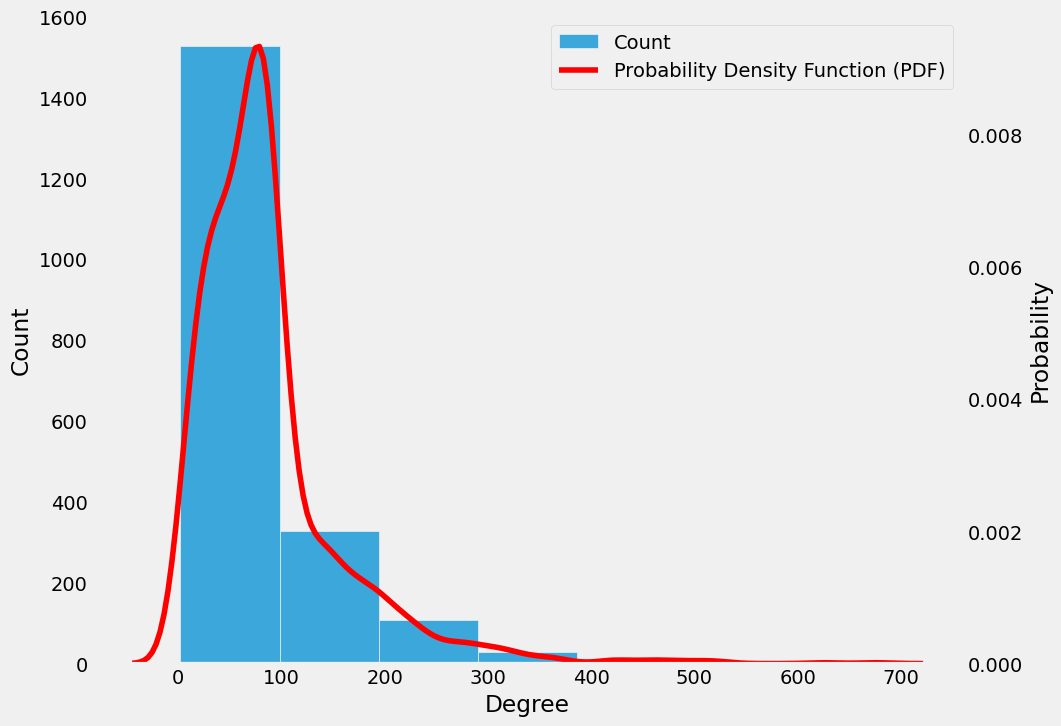

In [ ]:
plt.style.use("fivethirtyeight")

degree_sequence = sorted([d for n, d in SG.degree()], reverse=True)  

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

### K-core decomposition

In [ ]:
list(set([v for k,v in nx.core_number(SG).items()]))[-2:]

[97, 105]

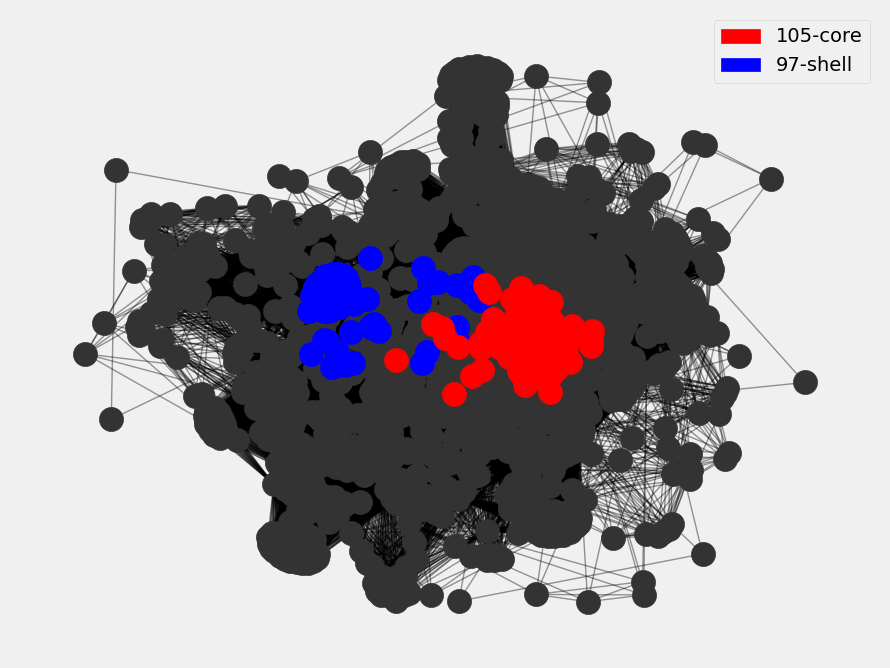

In [ ]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g_core_97 = nx.k_shell(SG, 97)
g_core_105 = nx.k_core(SG, 105)

# layout position
pos = nx.spring_layout(SG,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(SG,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(SG,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g_core_97,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(g_core_105,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='105-core')
blue_patch = mpatches.Patch(color='blue', label='97-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core.png', transparent=True,dpi=600)
plt.show()

In [ ]:
g_core_97.number_of_nodes()

95

In [ ]:
g_core_105.number_of_nodes()

106

In [ ]:
list(g_core_97.nodes())[:10]

['Gorillaz',
 'Erykah Badu',
 'TOKiMONSTA',
 'Washed Out',
 'Georgia Anne Muldrow',
 'The Roots',
 'Thievery Corporation',
 'Goapele',
 'PANTyRAiD',
 'The Verve']

In [ ]:
list(g_core_105.nodes())[:10]

['Rich Homie Quan',
 'Sleeping With Sirens',
 'Panic! At The Disco',
 'Adele',
 'Relient K',
 'Aaron Lewis',
 'Hot Chelle Rae',
 'Avicii',
 'Sheppard',
 'David Guetta']

In [ ]:
SG.degree('David Guetta')

423

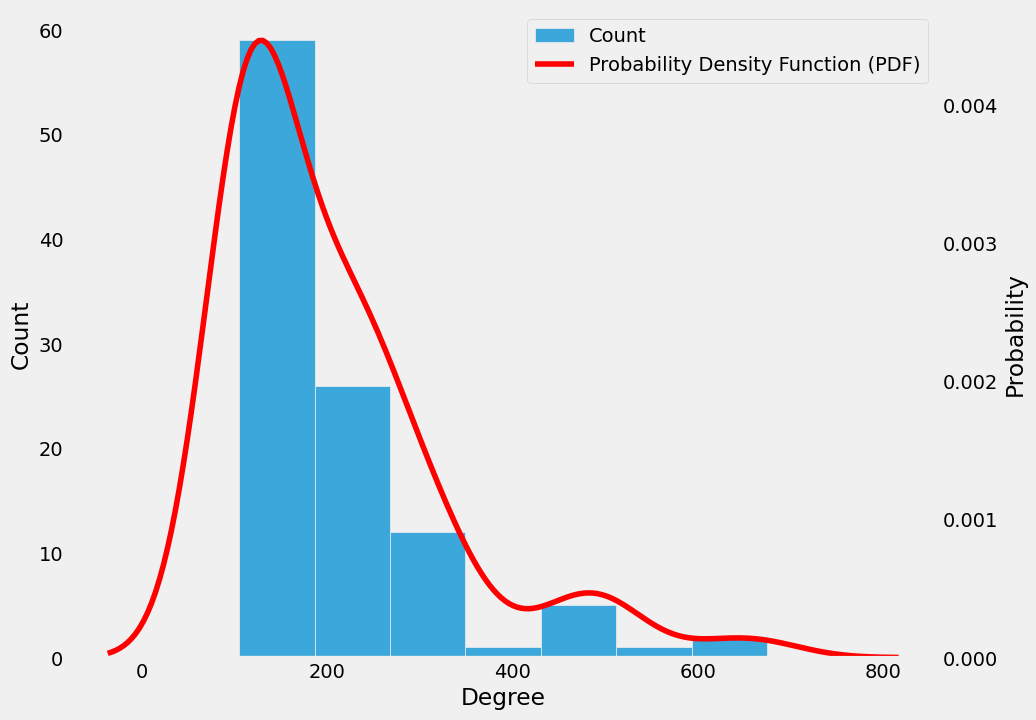

In [ ]:
plt.style.use("fivethirtyeight")

# degree sequence
degree_sequence = sorted([SG.degree(n) for n, d in g_core_105.degree()], reverse=True)  


fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()